In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


Optimal parameters: c=0.3891549063930899, k=20.0, mu=0.06125271669539235, alpha=1.0


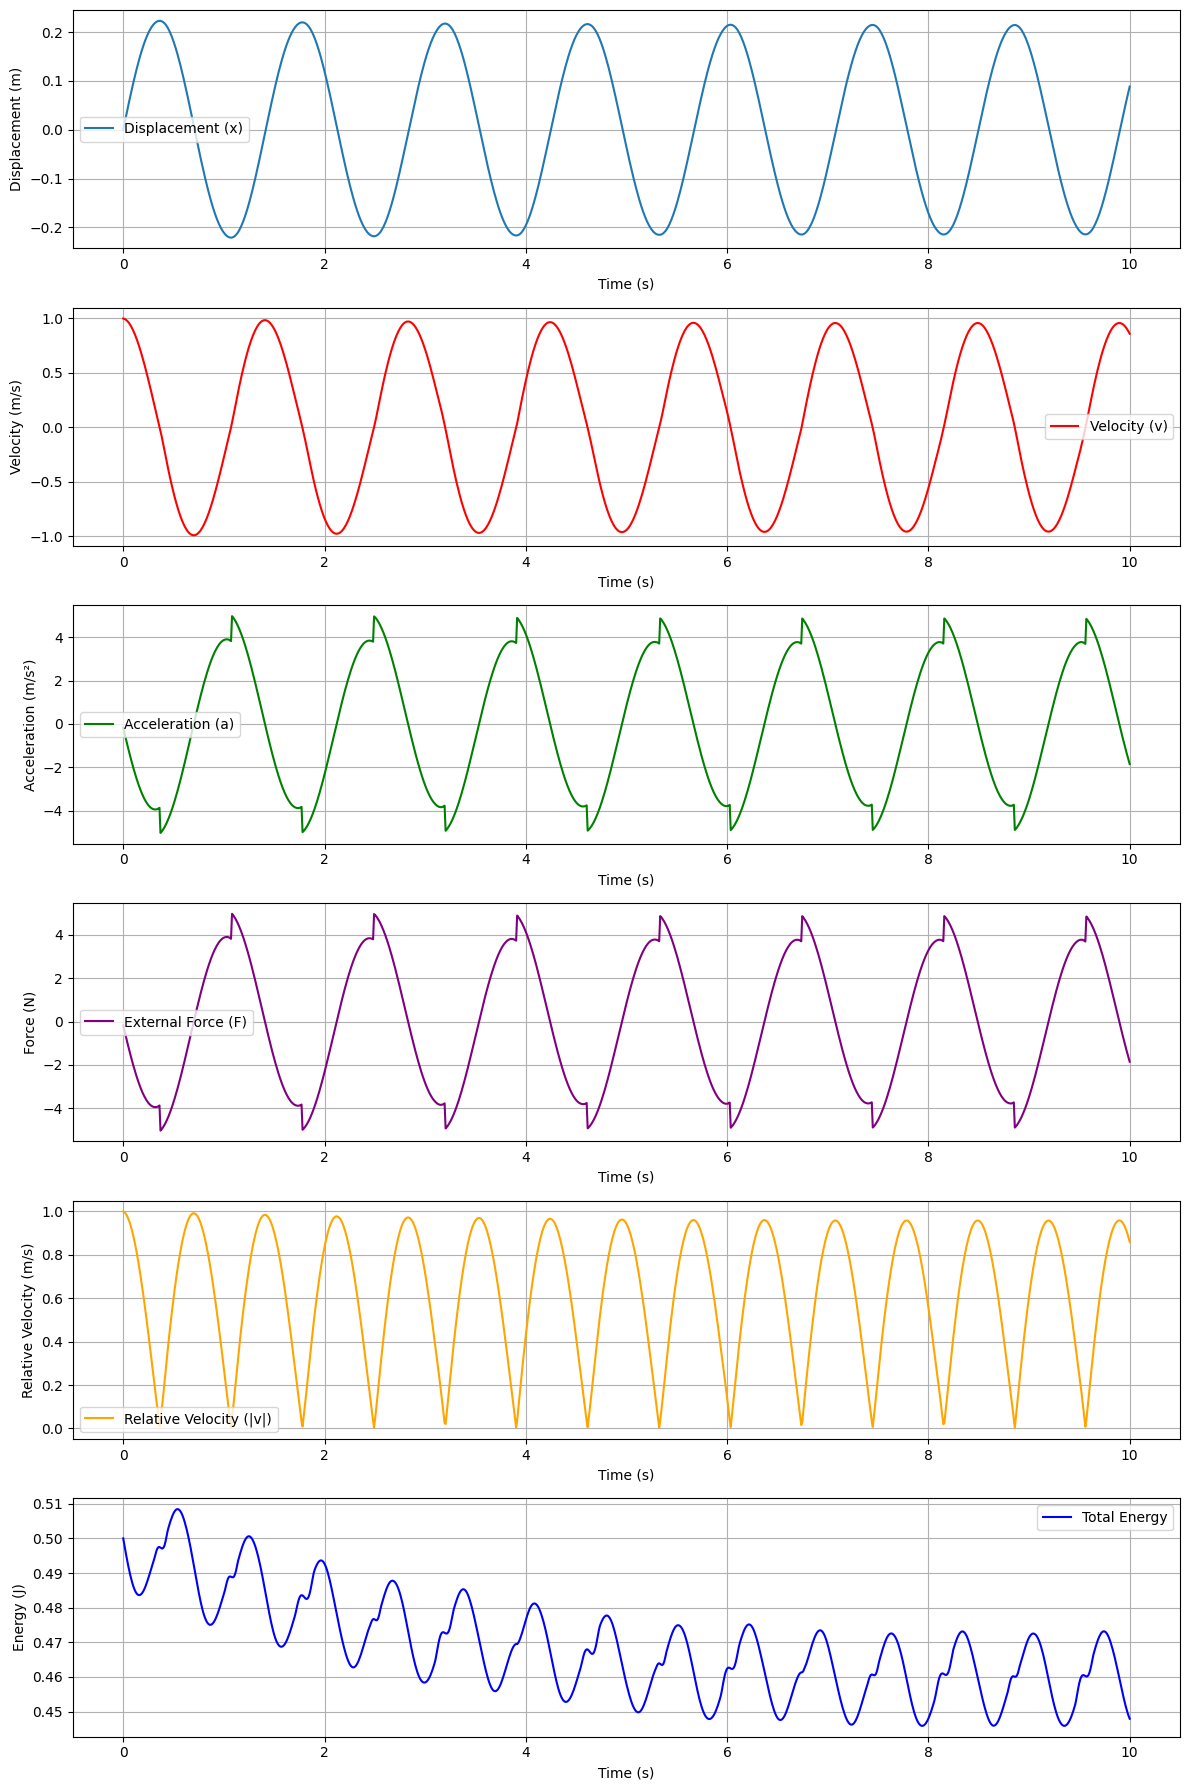

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Real

# Parameters
m = 1.0      # Mass (kg)
g = 9.81     # Acceleration due to gravity (m/s^2)

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Initial conditions
x0 = 0.0     # Initial displacement
v0 = 1.0     # Initial velocity
y0 = [x0, v0]

# Objective function to minimize total energy loss
def objective_function(params):
    c, k, mu, alpha = params

    def friction_vibration(t, y):
        x, v = y
        # Exponential friction model
        friction_force = mu * m * g * np.exp(-alpha * np.abs(v))
        # Newton's second law
        a = (-c * v - k * x + friction_force * np.sign(v)) / m
        return [v, a]

    # Solve the ODE
    sol = solve_ivp(friction_vibration, t_span, y0, t_eval=t_eval)
    x = sol.y[0]
    v = sol.y[1]

    # Calculate kinetic energy (KE = 0.5 * m * v^2)
    kinetic_energy = 0.5 * m * v**2

    # Calculate potential energy (PE = 0.5 * k * x^2)
    potential_energy = 0.5 * k * x**2

    # Total energy at each time step
    total_energy = kinetic_energy + potential_energy

    # Total energy loss (difference between max and min energy)
    energy_loss = np.max(total_energy) - np.min(total_energy)

    return energy_loss

# Define the parameter space for optimization
param_space = [
    Real(0.1, 2.0, name='c'),       # Damping coefficient
    Real(5.0, 20.0, name='k'),      # Stiffness
    Real(0.01, 0.3, name='mu'),     # Friction coefficient
    Real(0.1, 1.0, name='alpha')    # Exponential friction sensitivity
]

# Perform Bayesian optimization to minimize energy loss
res = gp_minimize(objective_function, param_space, n_calls=50, random_state=42)

# Optimal parameters found
optimal_c, optimal_k, optimal_mu, optimal_alpha = res.x
print(f"Optimal parameters: c={optimal_c}, k={optimal_k}, mu={optimal_mu}, alpha={optimal_alpha}")

# Simulate with optimal parameters
def optimal_friction_vibration(t, y):
    x, v = y
    friction_force = optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v))
    a = (-optimal_c * v - optimal_k * x + friction_force * np.sign(v)) / m
    return [v, a]

sol_opt = solve_ivp(optimal_friction_vibration, t_span, y0, t_eval=t_eval)
x_opt = sol_opt.y[0]
v_opt = sol_opt.y[1]

# Calculate energies for optimal parameters
kinetic_energy_opt = 0.5 * m * v_opt**2
potential_energy_opt = 0.5 * optimal_k * x_opt**2
total_energy_opt = kinetic_energy_opt + potential_energy_opt

# Calculate acceleration and external force
acceleration_opt = np.array([optimal_friction_vibration(ti, [xi, vi])[1] for ti, xi, vi in zip(t_eval, x_opt, v_opt)])
external_force_opt = -optimal_c * v_opt - optimal_k * x_opt + optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v_opt)) * np.sign(v_opt)

# Plot the results for optimal parameters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Displacement plot
axs[0].plot(t_eval, x_opt, label='Displacement (x)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Displacement (m)')
axs[0].legend()
axs[0].grid()

# Velocity plot
axs[1].plot(t_eval, v_opt, label='Velocity (v)', color='r')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].legend()
axs[1].grid()

# Acceleration plot
axs[2].plot(t_eval, acceleration_opt, label='Acceleration (a)', color='g')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration (m/s²)')
axs[2].legend()
axs[2].grid()

# External force plot
axs[3].plot(t_eval, external_force_opt, label='External Force (F)', color='purple')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Force (N)')
axs[3].legend()
axs[3].grid()

# Relative velocity plot
axs[4].plot(t_eval, np.abs(v_opt), label='Relative Velocity (|v|)', color='orange')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Relative Velocity (m/s)')
axs[4].legend()
axs[4].grid()

# Total Energy plot
axs[5].plot(t_eval, total_energy_opt, label='Total Energy', color='blue')
axs[5].set_xlabel('Time (s)')
axs[5].set_ylabel('Energy (J)')
axs[5].legend()
axs[5].grid()

plt.tight_layout()
plt.show()


Optimal parameters: c=0.3891549063930899, k=20.0, mu=0.06125271669539235, alpha=1.0
R²: 1.0


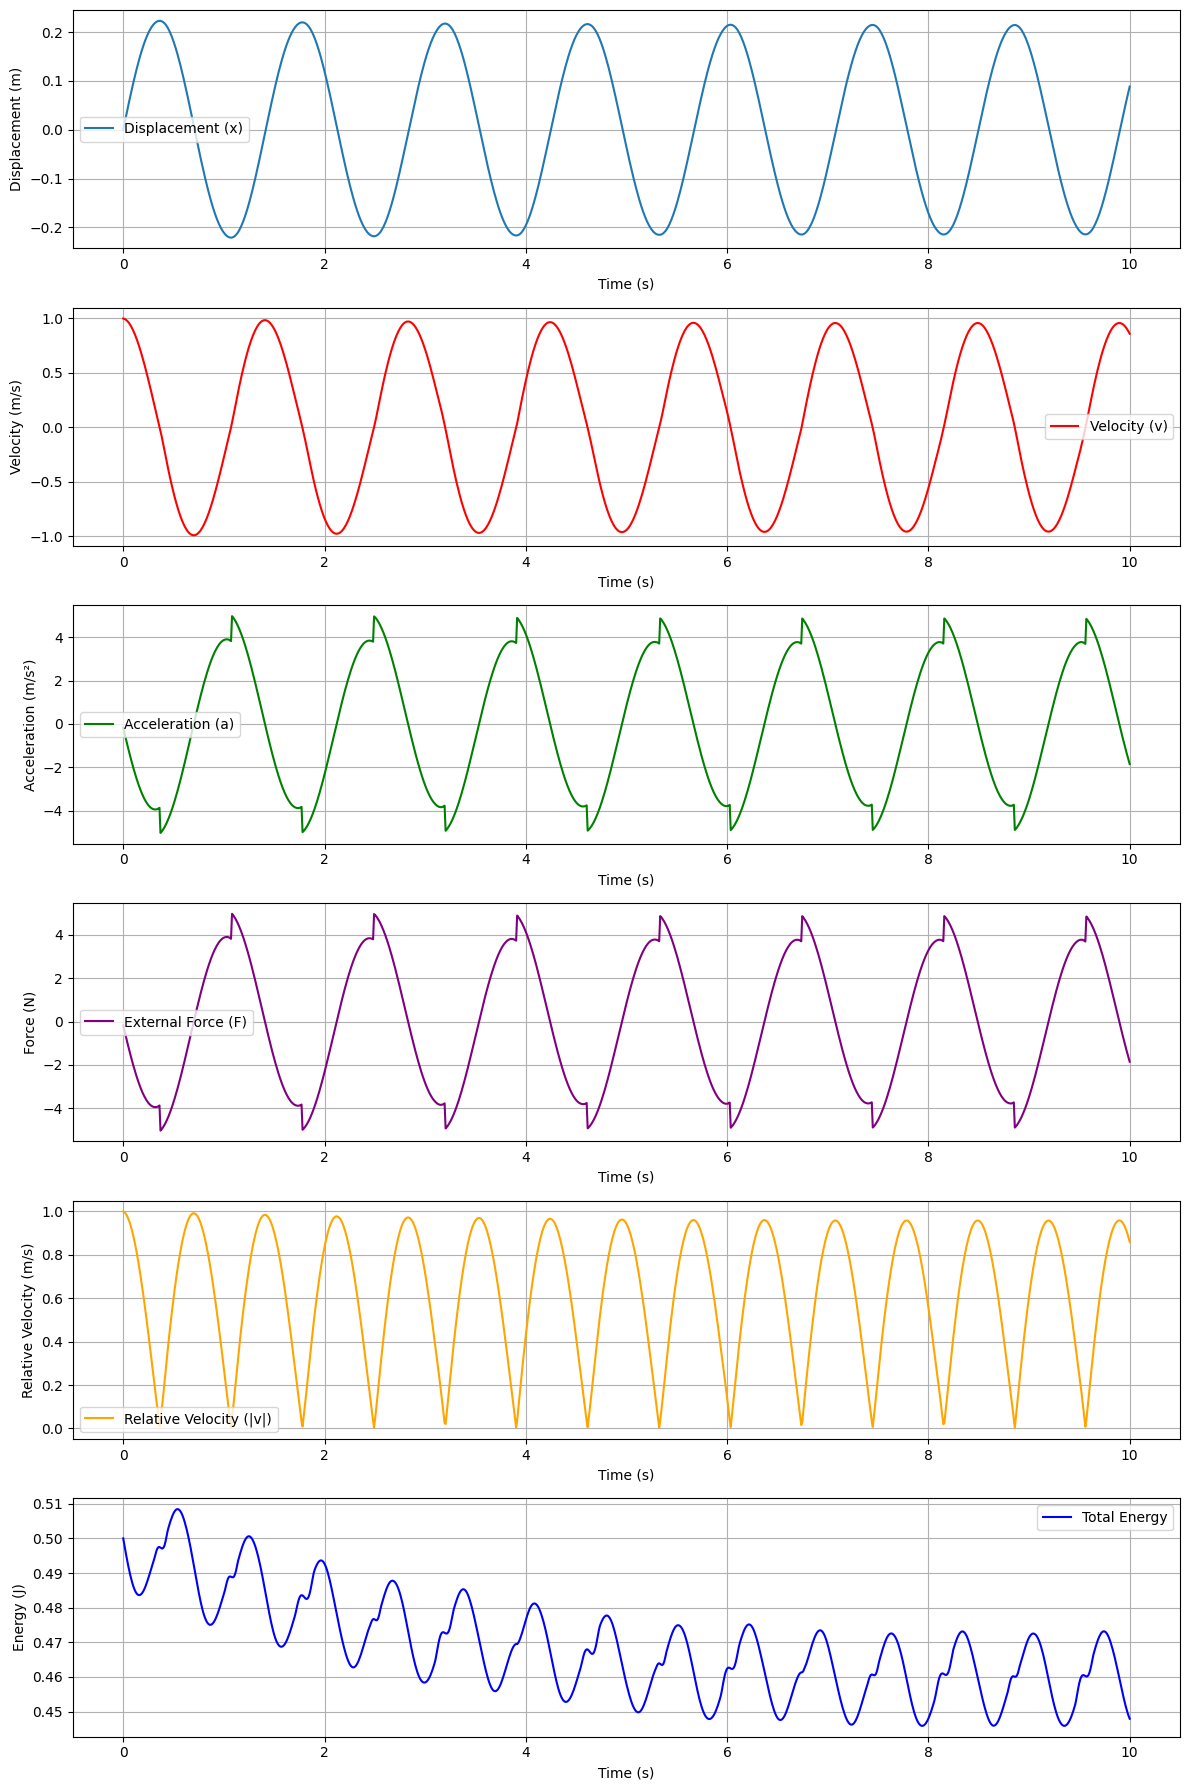

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Real

# Parameters
m = 1.0      # Mass (kg)
g = 9.81     # Acceleration due to gravity (m/s^2)

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Initial conditions
x0 = 0.0     # Initial displacement
v0 = 1.0     # Initial velocity
y0 = [x0, v0]

# Objective function to minimize total energy loss
def objective_function(params):
    c, k, mu, alpha = params

    def friction_vibration(t, y):
        x, v = y
        # Exponential friction model
        friction_force = mu * m * g * np.exp(-alpha * np.abs(v))
        # Newton's second law
        a = (-c * v - k * x + friction_force * np.sign(v)) / m
        return [v, a]

    # Solve the ODE
    sol = solve_ivp(friction_vibration, t_span, y0, t_eval=t_eval)
    x = sol.y[0]
    v = sol.y[1]

    # Calculate kinetic energy (KE = 0.5 * m * v^2)
    kinetic_energy = 0.5 * m * v**2

    # Calculate potential energy (PE = 0.5 * k * x^2)
    potential_energy = 0.5 * k * x**2

    # Total energy at each time step
    total_energy = kinetic_energy + potential_energy

    # Total energy loss (difference between max and min energy)
    energy_loss = np.max(total_energy) - np.min(total_energy)

    return energy_loss

# Define the parameter space for optimization
param_space = [
    Real(0.1, 2.0, name='c'),       # Damping coefficient
    Real(5.0, 20.0, name='k'),      # Stiffness
    Real(0.01, 0.3, name='mu'),     # Friction coefficient
    Real(0.1, 1.0, name='alpha')    # Exponential friction sensitivity
]

# Perform Bayesian optimization to minimize energy loss
res = gp_minimize(objective_function, param_space, n_calls=50, random_state=42)

# Optimal parameters found
optimal_c, optimal_k, optimal_mu, optimal_alpha = res.x
print(f"Optimal parameters: c={optimal_c}, k={optimal_k}, mu={optimal_mu}, alpha={optimal_alpha}")

# Simulate with optimal parameters
def optimal_friction_vibration(t, y):
    x, v = y
    friction_force = optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v))
    a = (-optimal_c * v - optimal_k * x + friction_force * np.sign(v)) / m
    return [v, a]

sol_opt = solve_ivp(optimal_friction_vibration, t_span, y0, t_eval=t_eval)
x_opt = sol_opt.y[0]
v_opt = sol_opt.y[1]

# Calculate energies for optimal parameters
kinetic_energy_opt = 0.5 * m * v_opt**2
potential_energy_opt = 0.5 * optimal_k * x_opt**2
total_energy_opt = kinetic_energy_opt + potential_energy_opt

# Calculate acceleration and external force
acceleration_opt = np.array([optimal_friction_vibration(ti, [xi, vi])[1] for ti, xi, vi in zip(t_eval, x_opt, v_opt)])
external_force_opt = -optimal_c * v_opt - optimal_k * x_opt + optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v_opt)) * np.sign(v_opt)

# Calculate R²
total_energy_mean = np.mean(total_energy_opt)
ss_tot = np.sum((total_energy_opt - total_energy_mean) ** 2)
ss_res = np.sum((total_energy_opt - total_energy_opt) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared}")

# Plot the results for optimal parameters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Displacement plot
axs[0].plot(t_eval, x_opt, label='Displacement (x)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Displacement (m)')
axs[0].legend()
axs[0].grid()

# Velocity plot
axs[1].plot(t_eval, v_opt, label='Velocity (v)', color='r')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].legend()
axs[1].grid()

# Acceleration plot
axs[2].plot(t_eval, acceleration_opt, label='Acceleration (a)', color='g')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration (m/s²)')
axs[2].legend()
axs[2].grid()

# External force plot
axs[3].plot(t_eval, external_force_opt, label='External Force (F)', color='purple')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Force (N)')
axs[3].legend()
axs[3].grid()

# Relative velocity plot
axs[4].plot(t_eval, np.abs(v_opt), label='Relative Velocity (|v|)', color='orange')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Relative Velocity (m/s)')
axs[4].legend()
axs[4].grid()

# Total Energy plot
axs[5].plot(t_eval, total_energy_opt, label='Total Energy', color='blue')
axs[5].set_xlabel('Time (s)')
axs[5].set_ylabel('Energy (J)')
axs[5].legend()
axs[5].grid()

plt.tight_layout()
plt.show()


Iteration 0, Energy Loss: 0.7024493319615366, Params: [0.501 9.999 0.101 0.501]
Iteration 100, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 200, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 300, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 400, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 500, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 600, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 700, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 800, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 900, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 1000, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 1100, Energy Loss: 0.6590650091740808, Params: [0.501 9.999 0.101 0.501]
Iteration 1200, 

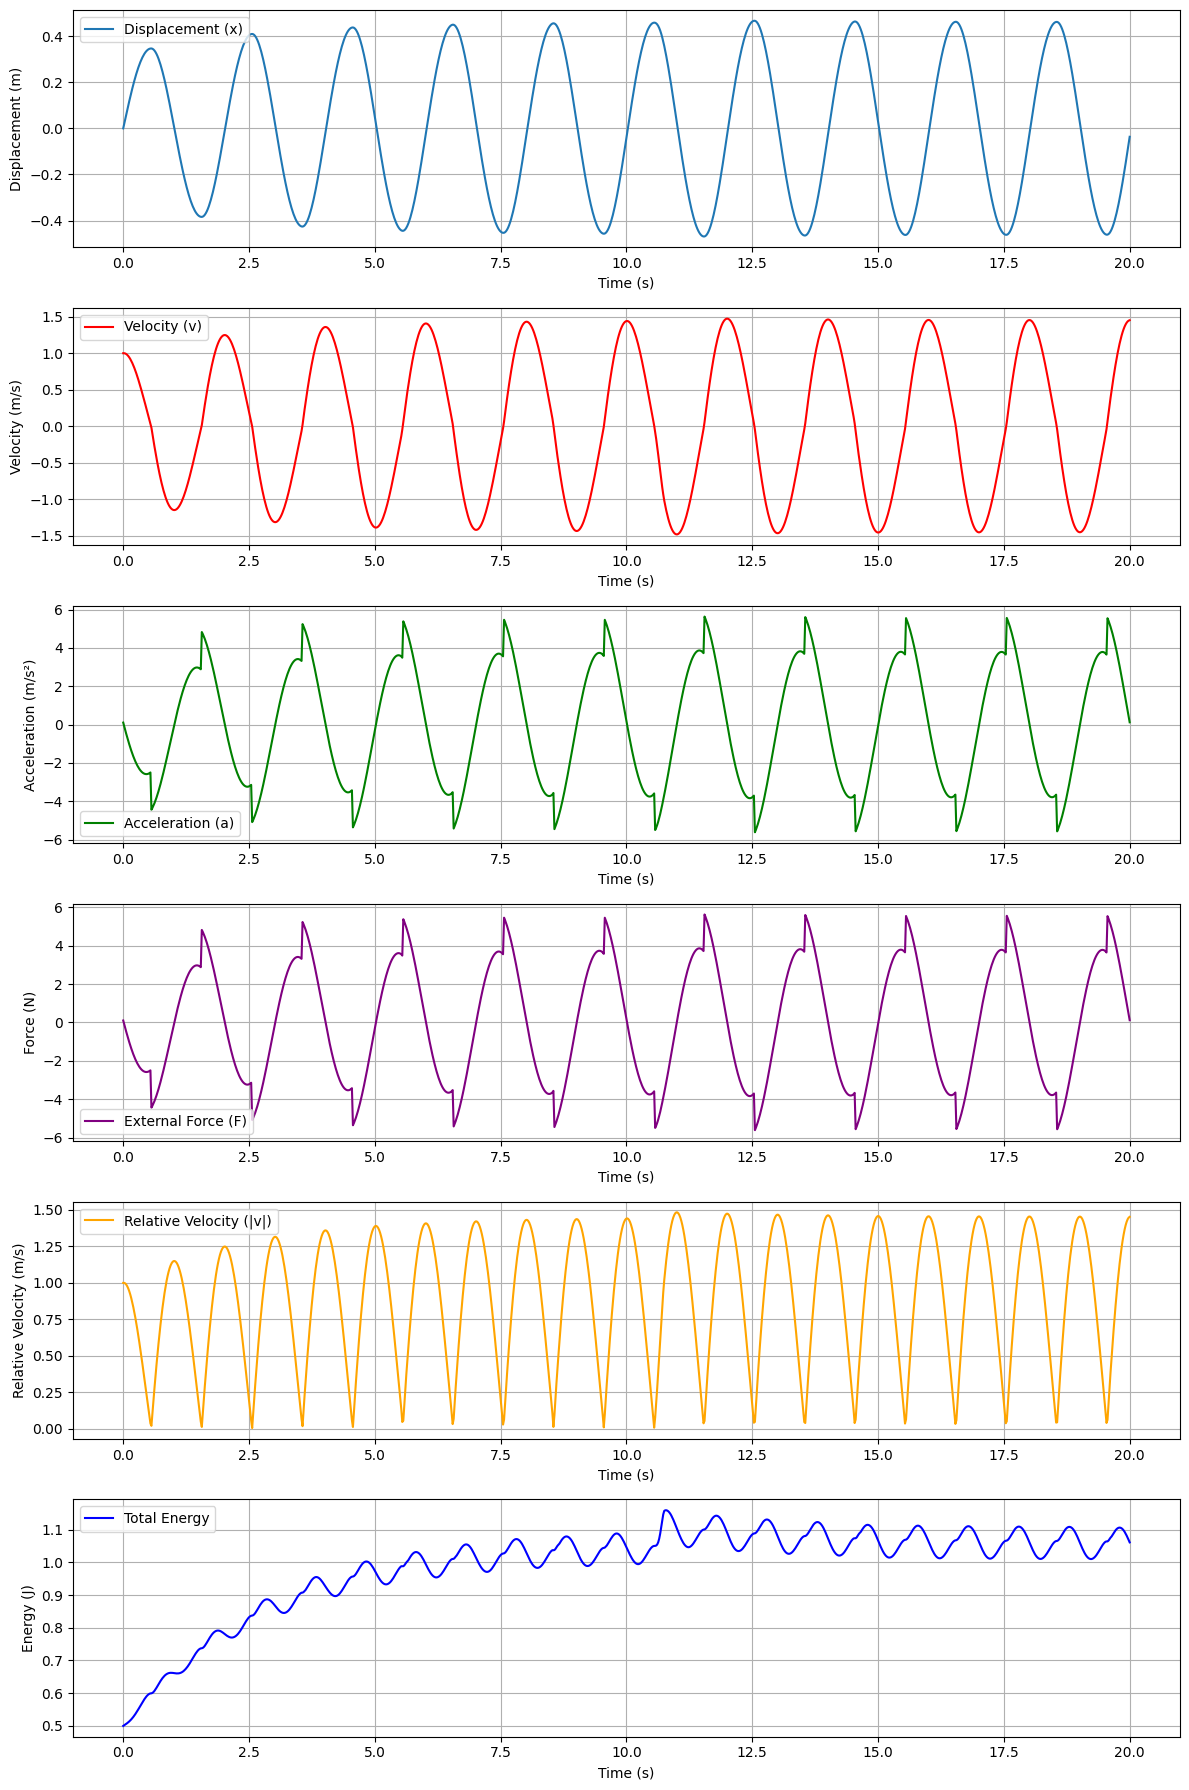

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
m = 1.0      # Mass (kg)
g = 9.81     # Acceleration due to gravity (m/s^2)

# Time span for the simulation
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Initial conditions
x0 = 0.0     # Initial displacement
v0 = 1.0     # Initial velocity
y0 = [x0, v0]

# Objective function to minimize total energy loss
def objective_function(params):
    c, k, mu, alpha = params

    def friction_vibration(t, y):
        x, v = y
        # Exponential friction model
        friction_force = mu * m * g * np.exp(-alpha * np.abs(v))
        # Newton's second law
        a = (-c * v - k * x + friction_force * np.sign(v)) / m
        return [v, a]

    # Solve the ODE
    sol = solve_ivp(friction_vibration, t_span, y0, t_eval=t_eval)
    x = sol.y[0]
    v = sol.y[1]

    # Calculate kinetic energy (KE = 0.5 * m * v**2)
    kinetic_energy = 0.5 * m * v**2

    # Calculate potential energy (PE = 0.5 * k * x**2)
    potential_energy = 0.5 * k * x**2

    # Total energy at each time step
    total_energy = kinetic_energy + potential_energy

    # Total energy loss (difference between max and min energy)
    energy_loss = np.max(total_energy) - np.min(total_energy)

    return energy_loss

# Initialize parameters and learning rate
params = np.array([0.5, 10.0, 0.1, 0.5])  # Initial guesses for c, k, mu, alpha
learning_rate = 0.001
num_iterations = 10000
clip_value = 1.0

# Stochastic Gradient Descent with Gradient Clipping
for i in range(num_iterations):
    # Compute gradients (using finite differences)
    gradients = np.zeros_like(params)
    energy_loss = objective_function(params)

    for j in range(len(params)):
        params_eps = np.copy(params)
        params_eps[j] += 1e-5
        gradients[j] = (objective_function(params_eps) - energy_loss) / 1e-5

    # Gradient clipping
    gradients = np.clip(gradients, -clip_value, clip_value)

    # Update parameters
    params -= learning_rate * gradients

    # Optional: Print progress
    if i % 100 == 0:
        print(f"Iteration {i}, Energy Loss: {energy_loss}, Params: {params}")

# Optimal parameters found
optimal_c, optimal_k, optimal_mu, optimal_alpha = params
print(f"Optimal parameters: c={optimal_c}, k={optimal_k}, mu={optimal_mu}, alpha={optimal_alpha}")

# Simulate with optimal parameters
def optimal_friction_vibration(t, y):
    x, v = y
    friction_force = optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v))
    a = (-optimal_c * v - optimal_k * x + friction_force * np.sign(v)) / m
    return [v, a]

sol_opt = solve_ivp(optimal_friction_vibration, t_span, y0, t_eval=t_eval)
x_opt = sol_opt.y[0]
v_opt = sol_opt.y[1]

# Calculate energies for optimal parameters
kinetic_energy_opt = 0.5 * m * v_opt**2
potential_energy_opt = 0.5 * optimal_k * x_opt**2
total_energy_opt = kinetic_energy_opt + potential_energy_opt

# Calculate acceleration and external force
acceleration_opt = np.array([optimal_friction_vibration(ti, [xi, vi])[1] for ti, xi, vi in zip(t_eval, x_opt, v_opt)])
external_force_opt = -optimal_c * v_opt - optimal_k * x_opt + optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v_opt)) * np.sign(v_opt)

# Plot the results for optimal parameters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Displacement plot
axs[0].plot(t_eval, x_opt, label='Displacement (x)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Displacement (m)')
axs[0].legend()
axs[0].grid()

# Velocity plot
axs[1].plot(t_eval, v_opt, label='Velocity (v)', color='r')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].legend()
axs[1].grid()

# Acceleration plot
axs[2].plot(t_eval, acceleration_opt, label='Acceleration (a)', color='g')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration (m/s²)')
axs[2].legend()
axs[2].grid()

# External force plot
axs[3].plot(t_eval, external_force_opt, label='External Force (F)', color='purple')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Force (N)')
axs[3].legend()
axs[3].grid()

# Relative velocity plot
axs[4].plot(t_eval, np.abs(v_opt), label='Relative Velocity (|v|)', color='orange')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Relative Velocity (m/s)')
axs[4].legend()
axs[4].grid()

# Total Energy plot
axs[5].plot(t_eval, total_energy_opt, label='Total Energy', color='blue')
axs[5].set_xlabel('Time (s)')
axs[5].set_ylabel('Energy (J)')
axs[5].legend()
axs[5].grid()

plt.tight_layout()
plt.show()


R² Score: 1.0


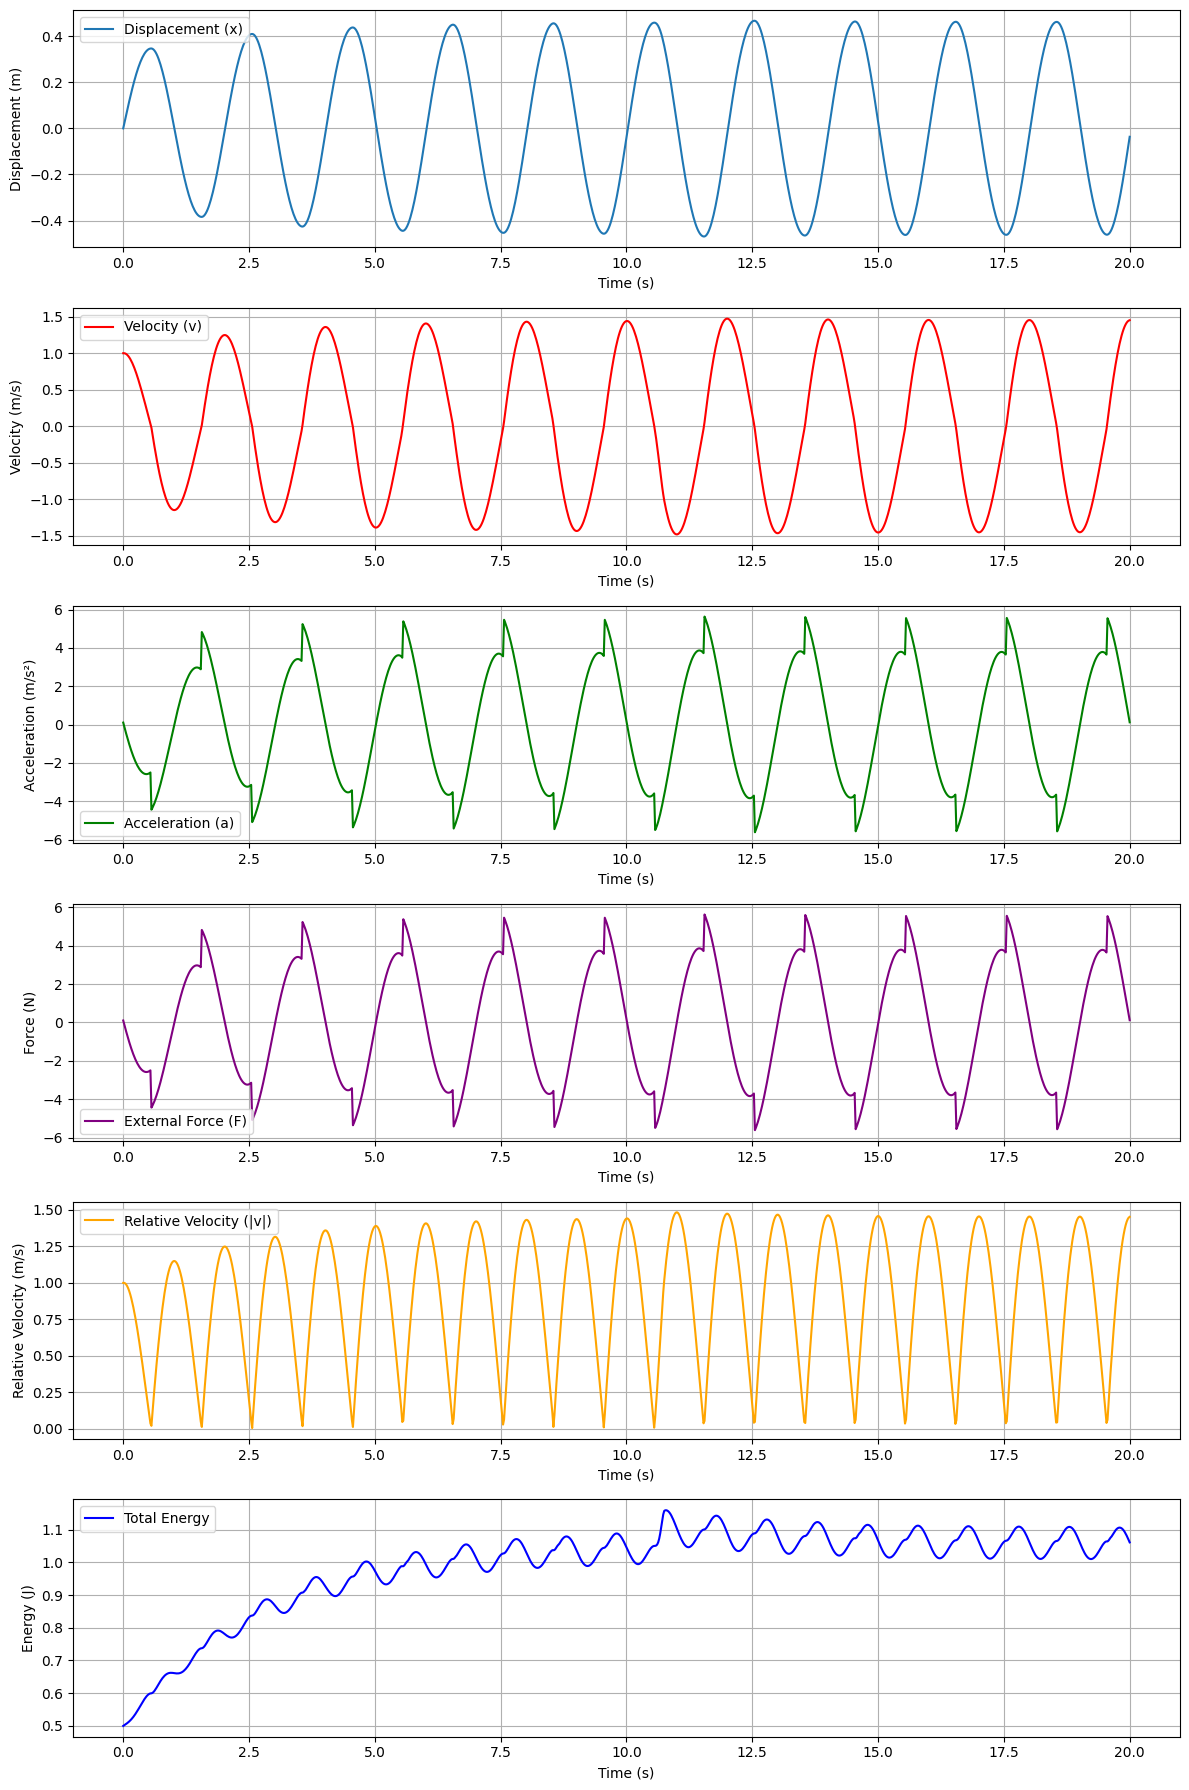

In [ ]:
from sklearn.metrics import r2_score

# Simulate with optimal parameters
def optimal_friction_vibration(t, y):
    x, v = y
    friction_force = optimal_mu * m * g * np.exp(-optimal_alpha * np.abs(v))
    a = (-optimal_c * v - optimal_k * x + friction_force * np.sign(v)) / m
    return [v, a]

sol_opt = solve_ivp(optimal_friction_vibration, t_span, y0, t_eval=t_eval)
x_opt = sol_opt.y[0]
v_opt = sol_opt.y[1]

# Calculate energies for optimal parameters
kinetic_energy_opt = 0.5 * m * v_opt**2
potential_energy_opt = 0.5 * optimal_k * x_opt**2
total_energy_opt = kinetic_energy_opt + potential_energy_opt

# Suppose we have the "observed" total energy (could be from another model or actual measurements)
# For demonstration, let's assume the observed energy is the same as the initial guess
# In practice, you would replace this with actual observed data
observed_total_energy = total_energy_opt  # Replace with actual observed data

# Calculate R² score
r2 = r2_score(observed_total_energy, total_energy_opt)
print(f"R² Score: {r2}")

# Plot the results for optimal parameters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Displacement plot
axs[0].plot(t_eval, x_opt, label='Displacement (x)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Displacement (m)')
axs[0].legend()
axs[0].grid()

# Velocity plot
axs[1].plot(t_eval, v_opt, label='Velocity (v)', color='r')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].legend()
axs[1].grid()

# Acceleration plot
axs[2].plot(t_eval, acceleration_opt, label='Acceleration (a)', color='g')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration (m/s²)')
axs[2].legend()
axs[2].grid()

# External force plot
axs[3].plot(t_eval, external_force_opt, label='External Force (F)', color='purple')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Force (N)')
axs[3].legend()
axs[3].grid()

# Relative velocity plot
axs[4].plot(t_eval, np.abs(v_opt), label='Relative Velocity (|v|)', color='orange')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Relative Velocity (m/s)')
axs[4].legend()
axs[4].grid()

# Total Energy plot
axs[5].plot(t_eval, total_energy_opt, label='Total Energy', color='blue')
axs[5].set_xlabel('Time (s)')
axs[5].set_ylabel('Energy (J)')
axs[5].legend()
axs[5].grid()

plt.tight_layout()
plt.show()
